In [1]:
"""
Fine-grained classification practice with Flower-17
"""

# Python Packages
import argparse
import os
import time
# 3rd Party Packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
import cv2
# User Packages
from start.preprocessing import ImageToTensorPreprocessor, ResizePreprocessor, ColorSpacePreprocessor
from start.loader import ImageCachedDataset
from start.model import MiniVGGNet

print('Tensorflow version: {}'.format(tf.__version__))

Tensorflow version: 1.12.0


In [2]:
# Load soldier-person dataset (Simeon)
"""
dataset = ImageCachedDataset(
    preprocessors=[
        ResizePreprocessor(224, 224, aspect_preserving=True),
        ColorSpacePreprocessor(conversion=cv2.COLOR_BGR2GRAY),
        ImageToTensorPreprocessor()
    ],
    dataset_path=r'T:\temp\simeon\dataset\custom'
)
dataset._ignored_labels.append('firearm')

(data, labels) = dataset.load(
    verbosity=80
)

classes = set(labels)

print('data shape: {}'.format(data.shape))
print('labels shape: {}'.format(labels.shape))
print('classes: {}'.format(classes))


# Normalize data
data = data.astype(np.float) / 255.0

# Split into train and test sets
(trainX, testX, trainY, testY) = train_test_split(
    data, labels,
    test_size=0.2,
    random_state=int(time.time()),
    stratify=list(labels)
)

# Free up the memory
del data
del labels
"""

[INFO] Processing label: person
[INFO] processed 80 person images
[INFO] processed 160 person images
[INFO] processed 240 person images
[INFO] processed 320 person images
[INFO] processed 400 person images
[INFO] processed 480 person images
[INFO] processed 560 person images
[INFO] processed 640 person images
[INFO] processed 720 person images
[INFO] processed 800 person images
[INFO] processed 880 person images
[INFO] processed 960 person images
[INFO] processed 1040 person images
[INFO] Processing label: soldier
[INFO] processed 80 soldier images
[INFO] processed 160 soldier images
[INFO] processed 240 soldier images
[INFO] processed 320 soldier images
[INFO] processed 400 soldier images
[INFO] processed 480 soldier images
[INFO] processed 560 soldier images
[INFO] processed 640 soldier images
[INFO] processed 720 soldier images
[INFO] processed 800 soldier images
[INFO] processed 880 soldier images
data shape: (1994, 224, 224, 1)
labels shape: (1994,)
classes: {'soldier', 'person'}


In [ ]:
# Load soldier-person dataset (Joann)

# TRAINING
training_dataset = ImageCachedDataset(
    preprocessors=[
        ResizePreprocessor(224, 224, aspect_preserving=True),
        ImageToTensorPreprocessor()
    ],
    dataset_path=r'T:\Joann Wang\Datasets\training',
    cache_path=r'T:\temp\simeon\For_Joann\2018-12-20\cache\train'
)

(trainX, trainY) = training_dataset.load(
    verbosity=80
)

classes = set(trainY)

print('Training data shape: {}'.format(trainX.shape))
print('Training labels shape: {}'.format(trainY.shape))
print('classes: {}'.format(classes))

# Normalize data
trainX = trainX.astype(np.float) / 255.0


# VALIDATION
validation_dataset = ImageCachedDataset(
    preprocessors=[
        ResizePreprocessor(224, 224, aspect_preserving=True),
        ImageToTensorPreprocessor()
    ],
    dataset_path=r'T:\Joann Wang\Datasets\val',
    cache_path=r'T:\temp\simeon\For_Joann\2018-12-20\cache\val'
)

(valX, valY) = validation_dataset.load(
    verbosity=80
)

print('Validation data shape: {}'.format(valX.shape))
print('Validation labels shape: {}'.format(valY.shape))

# Normalize data
valX = valX.astype(np.float) / 255.0

[INFO] Processing label: persons
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00001.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00002.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00003.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00004.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00005.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00006.jpg is not cached, caching preprocessors...
T:\temp\simeo

T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00055.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00056.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00057.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00058.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00059.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00060.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\trai

T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00107.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00108.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00109.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00110.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00111.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00112.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\trai

T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00160.jpg is not cached, caching preprocessors...
[INFO] processed 160 persons images
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00161.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00162.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00163.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00164.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00165.jpg is not cached, caching preprocessors...
T:\temp\si

T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00212.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00213.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00214.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00215.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00216.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00217.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\trai

T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00264.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00265.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00266.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00267.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00268.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00269.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\trai

T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00317.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00318.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00319.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00320.jpg is not cached, caching preprocessors...
[INFO] processed 320 persons images
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00321.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00322.jpg is not cached, caching preprocessors...
T:\temp\si

T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00371.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00372.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00373.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00374.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00375.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00376.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\trai

T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00425.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00426.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00427.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00428.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00429.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\train\persons\ResizePreprocessor_224x224\ImageToTensorPreprocessor\00430.jpg is not cached, caching preprocessors...
T:\temp\simeon\For_Joann\2018-12-20\cache\trai

[INFO] compiling model...
[INFO] ImageNet weights w/ Non-Standard Input Dimensions, redefining MobileNetV2 head...
[INFO] Finished compiling model...
Training on fold 0/10
[INFO] training network split 0...
Epoch 1/35
49/49 [==============================] - 36s 743ms/step - loss: 0.2651 - acc: 0.9076 - val_loss: 0.4653 - val_acc: 0.8820
Epoch 2/35
49/49 [==============================] - 10s 194ms/step - loss: 0.1199 - acc: 0.9775 - val_loss: 0.2540 - val_acc: 0.9317
Epoch 3/35
49/49 [==============================] - 11s 230ms/step - loss: 0.1106 - acc: 0.9723 - val_loss: 0.2928 - val_acc: 0.9379
Epoch 4/35
49/49 [==============================] - 11s 229ms/step - loss: 0.0739 - acc: 0.9898 - val_loss: 0.2567 - val_acc: 0.9565
Epoch 5/35
49/49 [==============================] - 11s 226ms/step - loss: 0.0728 - acc: 0.9884 - val_loss: 0.4379 - val_acc: 0.8820
Epoch 6/35
49/49 [==============================] - 11s 226ms/step - loss: 0.0726 - acc: 0.9872 - val_loss: 0.3602 - val_acc: 0.

c:\users\strieu\documents\python\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training on fold 1/10
[INFO] training network split 1...
Epoch 1/35
49/49 [==============================] - 12s 241ms/step - loss: 0.0556 - acc: 0.9949 - val_loss: 0.1159 - val_acc: 0.9812
Epoch 2/35
49/49 [==============================] - 11s 228ms/step - loss: 0.0479 - acc: 0.9968 - val_loss: 0.1266 - val_acc: 0.9750
Epoch 3/35
49/49 [==============================] - 11s 231ms/step - loss: 0.0426 - acc: 1.0000 - val_loss: 0.1384 - val_acc: 0.9688
Epoch 4/35
49/49 [==============================] - 11s 229ms/step - loss: 0.0534 - acc: 0.9962 - val_loss: 0.1564 - val_acc: 0.9688
Epoch 5/35
49/49 [==============================] - 11s 231ms/step - loss: 0.0513 - acc: 0.9974 - val_loss: 0.1377 - val_acc: 0.9688
Epoch 6/35
49/49 [==============================] - 11s 228ms/step - loss: 0.0610 - acc: 0.9936 - val_loss: 0.1212 - val_acc: 0.9750
Epoch 7/35
49/49 [==============================] - 11s 228ms/step - loss: 0.0442 - acc: 0.9994 - val_loss: 0.1861 - val_acc: 0.9563
Epoch 8/35
4

c:\users\strieu\documents\python\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training on fold 2/10
[INFO] training network split 2...
Epoch 1/35
49/49 [==============================] - 12s 238ms/step - loss: 0.0403 - acc: 1.0000 - val_loss: 0.5146 - val_acc: 0.9125
Epoch 2/35
49/49 [==============================] - 11s 230ms/step - loss: 0.0408 - acc: 1.0000 - val_loss: 0.3780 - val_acc: 0.9250
Epoch 3/35
49/49 [==============================] - 11s 229ms/step - loss: 0.0410 - acc: 1.0000 - val_loss: 0.3090 - val_acc: 0.9313
Epoch 4/35
49/49 [==============================] - 11s 228ms/step - loss: 0.0421 - acc: 0.9987 - val_loss: 0.4923 - val_acc: 0.9062
Epoch 5/35
49/49 [==============================] - 11s 231ms/step - loss: 0.0406 - acc: 1.0000 - val_loss: 0.5989 - val_acc: 0.8938
Epoch 6/35
49/49 [==============================] - 11s 229ms/step - loss: 0.0401 - acc: 1.0000 - val_loss: 0.5652 - val_acc: 0.8938
Epoch 7/35
49/49 [==============================] - 11s 228ms/step - loss: 0.0408 - acc: 1.0000 - val_loss: 0.5474 - val_acc: 0.9000
Epoch 8/35
4

c:\users\strieu\documents\python\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training on fold 3/10
[INFO] training network split 3...
Epoch 1/35
49/49 [==============================] - 12s 238ms/step - loss: 0.0389 - acc: 1.0000 - val_loss: 0.5799 - val_acc: 0.8438
Epoch 2/35
49/49 [==============================] - 11s 231ms/step - loss: 0.0402 - acc: 1.0000 - val_loss: 0.5815 - val_acc: 0.8187
Epoch 3/35
49/49 [==============================] - 11s 230ms/step - loss: 0.0392 - acc: 1.0000 - val_loss: 0.6363 - val_acc: 0.8063
Epoch 4/35
49/49 [==============================] - 11s 232ms/step - loss: 0.0388 - acc: 1.0000 - val_loss: 0.6255 - val_acc: 0.8000
Epoch 5/35
49/49 [==============================] - 11s 234ms/step - loss: 0.0391 - acc: 1.0000 - val_loss: 0.5611 - val_acc: 0.8125
Epoch 6/35
49/49 [==============================] - 11s 232ms/step - loss: 0.0386 - acc: 1.0000 - val_loss: 0.5481 - val_acc: 0.8187
Epoch 7/35
49/49 [==============================] - 11s 230ms/step - loss: 0.0394 - acc: 0.9994 - val_loss: 0.7388 - val_acc: 0.7875
Epoch 8/35
4

c:\users\strieu\documents\python\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training on fold 4/10
[INFO] training network split 4...
Epoch 1/35
49/49 [==============================] - 12s 245ms/step - loss: 0.0377 - acc: 1.0000 - val_loss: 0.9388 - val_acc: 0.8050
Epoch 2/35
49/49 [==============================] - 11s 221ms/step - loss: 0.0377 - acc: 1.0000 - val_loss: 0.8445 - val_acc: 0.8239
Epoch 3/35
49/49 [==============================] - 11s 226ms/step - loss: 0.0377 - acc: 1.0000 - val_loss: 0.8515 - val_acc: 0.8113
Epoch 4/35
49/49 [==============================] - 11s 227ms/step - loss: 0.0403 - acc: 0.9987 - val_loss: 0.1867 - val_acc: 0.9497
Epoch 5/35
49/49 [==============================] - 11s 235ms/step - loss: 0.0375 - acc: 1.0000 - val_loss: 0.1926 - val_acc: 0.9371
Epoch 6/35
49/49 [==============================] - 11s 224ms/step - loss: 0.0376 - acc: 1.0000 - val_loss: 0.1708 - val_acc: 0.9497
Epoch 7/35
49/49 [==============================] - 11s 228ms/step - loss: 0.0375 - acc: 1.0000 - val_loss: 0.1647 - val_acc: 0.9623
Epoch 8/35
4

c:\users\strieu\documents\python\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training on fold 5/10
[INFO] training network split 5...
Epoch 1/35
49/49 [==============================] - 12s 240ms/step - loss: 0.0395 - acc: 0.9987 - val_loss: 0.0624 - val_acc: 0.9937
Epoch 2/35
49/49 [==============================] - 11s 231ms/step - loss: 0.0374 - acc: 0.9994 - val_loss: 0.0846 - val_acc: 0.9811
Epoch 3/35
49/49 [==============================] - 11s 229ms/step - loss: 0.0379 - acc: 0.9994 - val_loss: 0.0977 - val_acc: 0.9811
Epoch 4/35
49/49 [==============================] - 11s 229ms/step - loss: 0.0370 - acc: 0.9994 - val_loss: 0.1206 - val_acc: 0.9686
Epoch 5/35
49/49 [==============================] - 11s 229ms/step - loss: 0.0397 - acc: 0.9987 - val_loss: 0.1591 - val_acc: 0.9497
Epoch 6/35
49/49 [==============================] - 11s 229ms/step - loss: 0.0428 - acc: 0.9981 - val_loss: 0.1635 - val_acc: 0.9497
Epoch 7/35
49/49 [==============================] - 11s 228ms/step - loss: 0.0368 - acc: 1.0000 - val_loss: 0.1945 - val_acc: 0.9308
Epoch 8/35
4

c:\users\strieu\documents\python\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training on fold 6/10
[INFO] training network split 6...
Epoch 1/35
49/49 [==============================] - 12s 242ms/step - loss: 0.0355 - acc: 1.0000 - val_loss: 0.2361 - val_acc: 0.9371
Epoch 2/35
49/49 [==============================] - 11s 227ms/step - loss: 0.0351 - acc: 1.0000 - val_loss: 0.2174 - val_acc: 0.9434
Epoch 3/35
49/49 [==============================] - 11s 227ms/step - loss: 0.0350 - acc: 1.0000 - val_loss: 0.2367 - val_acc: 0.9434
Epoch 4/35
49/49 [==============================] - 11s 227ms/step - loss: 0.0354 - acc: 1.0000 - val_loss: 0.1592 - val_acc: 0.9623
Epoch 5/35
49/49 [==============================] - 11s 229ms/step - loss: 0.0353 - acc: 1.0000 - val_loss: 0.1786 - val_acc: 0.9497
Epoch 6/35
49/49 [==============================] - 11s 228ms/step - loss: 0.0348 - acc: 1.0000 - val_loss: 0.1902 - val_acc: 0.9497
Epoch 7/35
49/49 [==============================] - 11s 227ms/step - loss: 0.0349 - acc: 1.0000 - val_loss: 0.1894 - val_acc: 0.9497
Epoch 8/35
4

c:\users\strieu\documents\python\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training on fold 7/10
[INFO] training network split 7...
Epoch 1/35
49/49 [==============================] - 12s 242ms/step - loss: 0.0338 - acc: 1.0000 - val_loss: 0.1960 - val_acc: 0.9497
Epoch 2/35
49/49 [==============================] - 11s 227ms/step - loss: 0.0340 - acc: 1.0000 - val_loss: 0.2473 - val_acc: 0.9434
Epoch 3/35
49/49 [==============================] - 11s 228ms/step - loss: 0.0337 - acc: 1.0000 - val_loss: 0.2461 - val_acc: 0.9434
Epoch 4/35
49/49 [==============================] - 11s 227ms/step - loss: 0.0371 - acc: 0.9987 - val_loss: 0.2131 - val_acc: 0.9497
Epoch 5/35
49/49 [==============================] - 11s 228ms/step - loss: 0.0338 - acc: 1.0000 - val_loss: 0.2178 - val_acc: 0.9497
Epoch 6/35
49/49 [==============================] - 11s 228ms/step - loss: 0.0337 - acc: 1.0000 - val_loss: 0.2305 - val_acc: 0.9434
Epoch 7/35
49/49 [==============================] - 11s 233ms/step - loss: 0.0336 - acc: 1.0000 - val_loss: 0.2331 - val_acc: 0.9371
Epoch 8/35
4

c:\users\strieu\documents\python\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training on fold 8/10
[INFO] training network split 8...
Epoch 1/35
49/49 [==============================] - 12s 242ms/step - loss: 0.0328 - acc: 1.0000 - val_loss: 0.3284 - val_acc: 0.8994
Epoch 2/35
49/49 [==============================] - 11s 228ms/step - loss: 0.0328 - acc: 1.0000 - val_loss: 0.3370 - val_acc: 0.8931
Epoch 3/35
49/49 [==============================] - 11s 228ms/step - loss: 0.0326 - acc: 1.0000 - val_loss: 0.3339 - val_acc: 0.8931
Epoch 4/35
49/49 [==============================] - 11s 230ms/step - loss: 0.0330 - acc: 1.0000 - val_loss: 0.3726 - val_acc: 0.8931
Epoch 5/35
49/49 [==============================] - 11s 228ms/step - loss: 0.0326 - acc: 1.0000 - val_loss: 0.3451 - val_acc: 0.8931
Epoch 6/35
49/49 [==============================] - 11s 227ms/step - loss: 0.0367 - acc: 0.9981 - val_loss: 0.1052 - val_acc: 0.9748
Epoch 7/35
49/49 [==============================] - 11s 228ms/step - loss: 0.0325 - acc: 1.0000 - val_loss: 0.1065 - val_acc: 0.9748
Epoch 8/35
4

c:\users\strieu\documents\python\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training on fold 9/10
[INFO] training network split 9...
Epoch 1/35
49/49 [==============================] - 12s 248ms/step - loss: 0.0317 - acc: 1.0000 - val_loss: 0.2928 - val_acc: 0.9182
Epoch 2/35
49/49 [==============================] - 12s 236ms/step - loss: 0.0316 - acc: 1.0000 - val_loss: 0.3064 - val_acc: 0.9057
Epoch 3/35
49/49 [==============================] - 11s 230ms/step - loss: 0.0315 - acc: 1.0000 - val_loss: 0.2973 - val_acc: 0.9119
Epoch 4/35
49/49 [==============================] - 11s 231ms/step - loss: 0.0315 - acc: 1.0000 - val_loss: 0.2954 - val_acc: 0.9119
Epoch 5/35
49/49 [==============================] - 11s 231ms/step - loss: 0.0314 - acc: 1.0000 - val_loss: 0.2920 - val_acc: 0.9119
Epoch 6/35
49/49 [==============================] - 11s 231ms/step - loss: 0.0314 - acc: 1.0000 - val_loss: 0.2917 - val_acc: 0.9119
Epoch 7/35
49/49 [==============================] - 12s 239ms/step - loss: 0.0313 - acc: 1.0000 - val_loss: 0.2906 - val_acc: 0.9119
Epoch 8/35
4

c:\users\strieu\documents\python\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


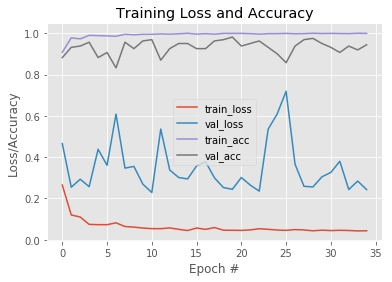

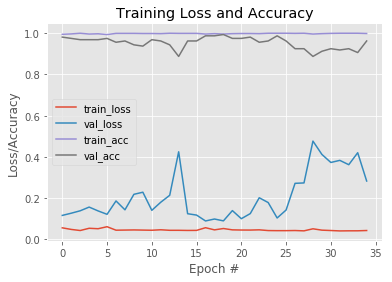

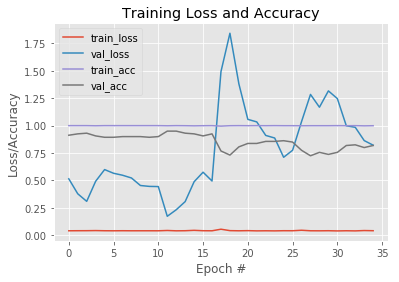

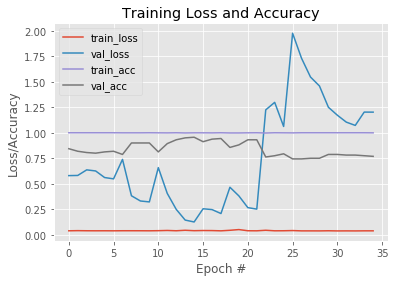

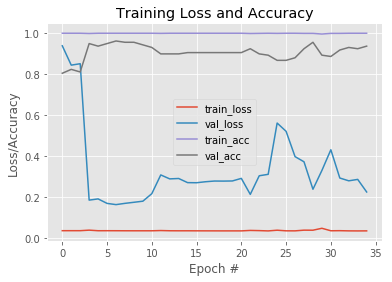

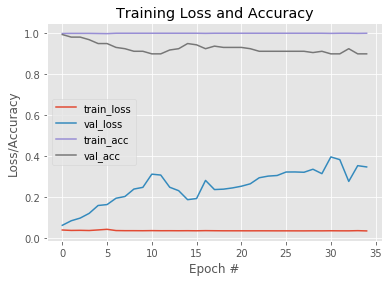

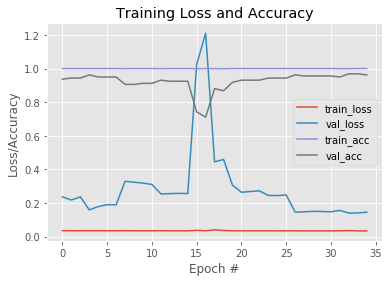

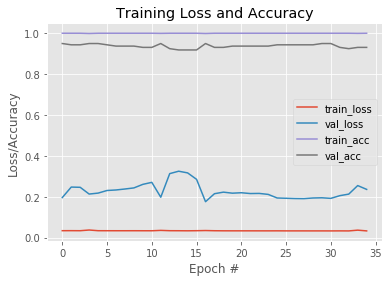

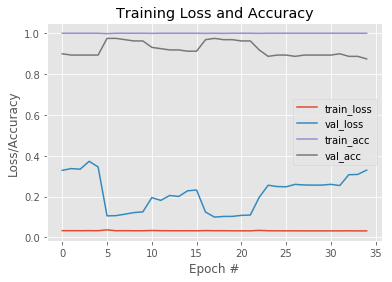

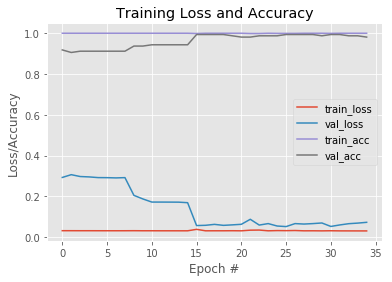

In [3]:
# Setup data splits
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import TensorBoard
import pycm

N_EPOCHS = 35
BATCH_SIZE = 32
n_classes = len(classes)
kfold_splits = 10 #empirical
timestamp = time.time()

# Instantiate the cross validator
skf = StratifiedKFold(n_splits=kfold_splits, shuffle=True)

# Convert output to either binarized one-hot vectors for categorical or 0/1 for binary
if n_classes > 2:
    lb = LabelBinarizer()
    testY = lb.fit_transform(testY)
else:
    le = LabelEncoder()
    testY = le.fit_transform(testY)
    
# Data augmentation
augmenter = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Initialize the optimizer and model
print('[INFO] compiling model...')
#model = create_model(n_classes=n_classes)
from start.model import MobileNetV2
model = MobileNetV2.build({
    'width':    224,
    'height':   224,
    'channels': 1,
    'weights': 'imagenet',
    'classes': classes,
    'dense_units': 242,
    'dropout_rate': 0.43,
    'regularization_strength': 0.0001
})

# Optimizer
opt = SGD(lr=0.05)

# Compile
if n_classes > 2:
    model.compile(
        loss='categorical_crossentropy',
        optimizer=opt,
        metrics=['accuracy']
    )
else:
    model.compile(
        loss='binary_crossentropy',
        optimizer=opt,
        metrics=['accuracy']
    )
print('[INFO] Finished compiling model...')
            

for index, (train_indices, val_indices) in enumerate(skf.split(trainX, trainY)):
    print('Training on fold {}/{}'.format(index, kfold_splits))

    #trainSplitX, valSplitX = trainX[train_indices], trainX[val_indices]
    trainSplitY, valSplitY = trainY[train_indices], trainY[val_indices]
    
    # Convert output to either binarized one-hot vectors for categorical or 0/1 for binary
    if n_classes > 2:
        trainSplitY = lb.fit_transform(trainY[train_indices])
        valSplitY = lb.fit_transform(trainY[val_indices])
    else:
        trainSplitY = le.fit_transform(trainY[train_indices])
        valSplitY = le.fit_transform(trainY[val_indices])

    # Initialize TensorBoard
    """
    tb_callback = TensorBoard(
        log_dir='./logs/splitindex{}'.format(index), 
        histogram_freq=1, 
        batch_size=BATCH_SIZE, 
        write_graph=False, 
        write_grads=False, 
        write_images=False, 
        embeddings_freq=0,
        embeddings_layer_names=None, 
        embeddings_metadata=None, 
        embeddings_data=None
    )
    """

    # Train the network
    print('[INFO] training network split {}...'.format(index))
    callbacks = []
    try:
        if tb_callback is not None:
            callbacks.append(tb_callback)
    except NameError:
        pass
    history = model.fit_generator(
        augmenter.flow(trainX[train_indices], trainSplitY, 
                       batch_size=BATCH_SIZE),
        validation_data=(trainX[val_indices], valSplitY),
        steps_per_epoch=len(trainX) // BATCH_SIZE,
        epochs=N_EPOCHS,
        callbacks=callbacks,
        verbose=1
    )

    # Evaluate the network
    print('[INFO] evaluating network split {}...'.format(index))
    predictions = model.predict(testX, batch_size=BATCH_SIZE)
    if not n_classes > 2:
        threshold = 0.5
        predictions_probability = predictions
        predictions[predictions>threshold] = 1
        predictions[predictions<=threshold] = 0
        predictions = predictions.astype(np.int)
        

    if n_classes > 2:
        cm = pycm.ConfusionMatrix(
            actual_vector=lb.inverse_transform(testY),
            predict_vector=lb.inverse_transform(predictions)
        )
    else:
        cm = pycm.ConfusionMatrix(
            actual_vector=le.inverse_transform(testY),
            predict_vector=le.inverse_transform(predictions)
        )
    cm.save_html(r'T:\temp\simeon\dataset\{}_confusion_matrix_splitindex{}'.format(timestamp, index))

    # Plot the training loss and accuracy
    plt.style.use('ggplot')
    plt.figure()
    plt.plot(np.arange(0, N_EPOCHS), history.history['loss'], label='train_loss')
    plt.plot(np.arange(0, N_EPOCHS), history.history['val_loss'], label='val_loss')
    plt.plot(np.arange(0, N_EPOCHS), history.history['acc'], label='train_acc')
    plt.plot(np.arange(0, N_EPOCHS), history.history['val_acc'], label='val_acc')
    plt.title('Training Loss and Accuracy')
    plt.xlabel('Epoch #')
    plt.ylabel('Loss/Accuracy')
    plt.legend()
    plt.savefig(r'T:\temp\simeon\dataset\{}_training_splitindex{}.jpg'.format(timestamp, index))

classes: {'soldier', 'person'}
testY shape: (399,)
predictions shape: (399, 1)
soldiers_classified_people shape: (21, 224, 224, 1)
probability shape: (21, 1)
probability: 
[[3.3889073e-01]
 [3.2217436e-02]
 [9.7926961e-05]
 [4.1689029e-01]
 [4.8038564e-04]
 [5.0013717e-02]
 [2.5134943e-09]
 [1.1214805e-02]
 [6.1052680e-02]
 [3.5010546e-01]
 [1.3498562e-02]
 [6.8742678e-02]
 [1.6119096e-01]
 [8.9749293e-03]
 [6.2255422e-03]
 [3.9915215e-02]
 [3.4716621e-03]
 [1.2966467e-02]
 [2.8610289e-01]
 [8.6680502e-03]
 [1.6434368e-02]]
6 x 4 plot


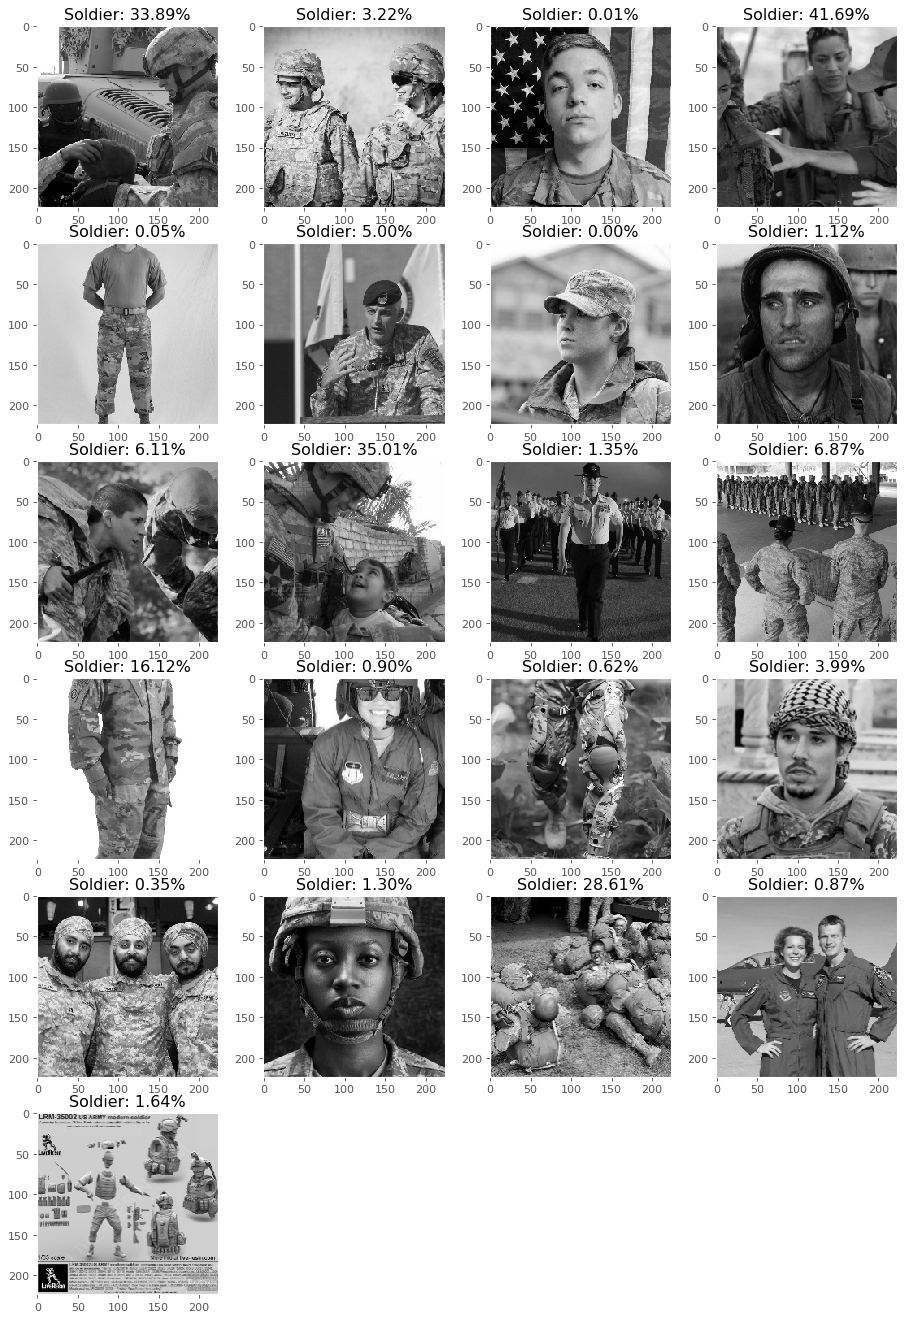

In [12]:
# Evaluate the network
predictions = model.predict(testX, batch_size=BATCH_SIZE)
if not n_classes > 2:
    threshold = 0.5
    predictions_probability = predictions.copy()
    predictions[predictions>threshold] = 1
    predictions[predictions<=threshold] = 0
    predictions = predictions.astype(np.int)

# Plot images that were soldiers classified as people
print('classes: {}'.format(classes))
print('testY shape: {}'.format(testY.shape))
print('predictions shape: {}'.format(predictions.shape))
soldiers_classified_people = testX[np.logical_and(testY == 1, np.squeeze(predictions) == 0)]
try:
    probability = predictions_probability[np.logical_and(testY == 1, np.squeeze(predictions) == 0)]
except NameError:
    pass
print('soldiers_classified_people shape: {}'.format(soldiers_classified_people.shape))
print('probability shape: {}'.format(probability.shape))
print('probability: \n{}'.format(probability))
# Draw figure
if soldiers_classified_people.shape[0] > 0:
    IMAGES_PER_ROW = 4
    rows = (soldiers_classified_people.shape[0] // IMAGES_PER_ROW) + 1
    f = plt.figure(
        num=1, 
        figsize=(14, int(14*rows/float(IMAGES_PER_ROW))), 
        dpi=80, 
        facecolor='w', 
        edgecolor='k'
    )
    print('{} x {} plot'.format(rows, IMAGES_PER_ROW))
    for subidx in range(soldiers_classified_people.shape[0]):
        # subplot is 1-indexed
        plt.subplot(rows, IMAGES_PER_ROW, subidx+1)
        f.gca().grid(False)
        try:
            plt.title('Soldier: {0:.2f}%'.format(np.asscalar(probability[subidx])*100.0))
        except NameError:
            pass
        
        if(soldiers_classified_people[subidx][..., ::-1].shape[2] < 3):
            # Convert to RGB, since pyplot need RGB images
            plt.imshow(cv2.cvtColor(
                (soldiers_classified_people[subidx][..., ::-1]*255.0).astype(np.uint8),
                cv2.COLOR_GRAY2RGB
            ))
        else:
            plt.imshow(soldiers_classified_people[subidx][..., ::-1])
    plt.show()

classes: {'soldier', 'person'}
testY shape: (399,)
predictions shape: (399, 1)
people_classified_soldiers shape: (3, 224, 224, 1)
probability shape: (3, 1)
probability: 
[[0.94181883]
 [0.99998367]
 [0.667763  ]]
1 x 4 plot


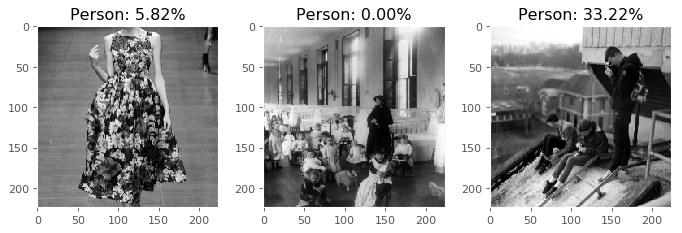

In [13]:
# Evaluate the network
predictions = model.predict(testX, batch_size=BATCH_SIZE)
if not n_classes > 2:
    threshold = 0.5
    predictions_probability = predictions.copy()
    predictions[predictions>threshold] = 1
    predictions[predictions<=threshold] = 0
    predictions = predictions.astype(np.int)

# Plot images that were people classified as soldiers
print('classes: {}'.format(classes))
print('testY shape: {}'.format(testY.shape))
print('predictions shape: {}'.format(predictions.shape))
people_classified_soldiers = testX[np.logical_and(testY == 0, np.squeeze(predictions) == 1)]
try:
    probability = predictions_probability[np.logical_and(testY == 0, np.squeeze(predictions) == 1)]
except NameError:
    pass
print('people_classified_soldiers shape: {}'.format(people_classified_soldiers.shape))
print('probability shape: {}'.format(probability.shape))
print('probability: \n{}'.format(probability))
# Draw figure
if people_classified_soldiers.shape[0] > 0:
    IMAGES_PER_ROW = 4
    rows = (people_classified_soldiers.shape[0] // IMAGES_PER_ROW) + 1
    f = plt.figure(
        num=2, 
        figsize=(14, int(14*rows/float(IMAGES_PER_ROW))), 
        dpi=80, 
        facecolor='w', 
        edgecolor='k'
    )
    print('{} x {} plot'.format(rows, IMAGES_PER_ROW))
    for subidx in range(people_classified_soldiers.shape[0]):
        # subplot is 1-indexed
        plt.subplot(rows, IMAGES_PER_ROW, subidx+1)
        f.gca().grid(False)
        try:
            plt.title('Person: {0:.2f}%'.format(np.asscalar(1.0-probability[subidx])*100.0))
        except NameError:
            pass
        
        if(people_classified_soldiers[subidx][..., ::-1].shape[2] < 3):
            # Convert to RGB, since pyplot need RGB images
            plt.imshow(cv2.cvtColor(
                (people_classified_soldiers[subidx][..., ::-1]*255.0).astype(np.uint8),
                cv2.COLOR_GRAY2RGB
            ))
        else:
            plt.imshow(people_classified_soldiers[subidx][..., ::-1])
        
    plt.show()

In [ ]:
# Save the model!
model.save_weights(r'T:\temp\simeon\dataset\{}_mnv2_soldier-person_StratifiedKFold10_weights.h5'.format(timestamp))

In [ ]:
model.summary()

In [ ]:
model.layers[0].summary()